# Predicting the Emergence of Food Deserts 

**Term Project Group 37** 

- Nigele X McCoy (nmccoy9@gatech.edu), Anthony Philip Lee (alee657@gatech.edu) 

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from matplotlib.colors import ListedColormap
import scipy.io as sio
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

##  Data Preparation

- **Crime Data** 

In [2]:
## Crime 

In [3]:
crimeData = pd.read_csv('crime_data_w_population_and_crime_rate.csv')
crimeData['county_name'] = crimeData['county_name'].str.replace('County','')
crimeData['county_name'] = crimeData['county_name'].str.replace(' ','')
crimeData.head(5)

,county_name,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,"St.Louiscity,MO",1791.995377,1,1,4,1612,318667,318667,15,15,...,200,1778,3609,4995,13791,3543,464,318416,29,510
1,"Crittenden,AR",1754.914968,2,1,4,130,50717,50717,4,4,...,38,165,662,1482,1753,189,28,49746,5,35
2,"Alexander,IL",1664.700485,3,1,4,604,8040,8040,2,2,...,2,5,119,82,184,12,2,7629,17,3
3,"Kenedy,TX",1456.310680,4,1,4,2681,444,444,1,1,...,3,1,2,5,4,4,0,412,48,261
4,"DeSotoParish,LA",1447.402430,5,1,4,1137,26971,26971,3,3,...,4,17,368,149,494,60,0,27083,22,31


In [4]:
# Crime describe

In [5]:
crimeData.describe()

,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,COVIND,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
count,3136.000000,3136.000000,3136.0,3136.0,3136.000000,3.136000e+03,3.136000e+03,3136.000000,3136.000000,3136.000000,...,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3.136000e+03,3136.000000,3136.000000
mean,235.085665,1568.500000,1.0,4.0,1590.655612,9.977578e+04,9.841005e+04,6.201212,5.400510,98.154624,...,26.324936,112.447704,238.644133,660.654337,1923.397959,227.536671,16.765625,1.007329e+05,30.339286,103.628827
std,200.502872,905.429548,0.0,0.0,916.038464,3.198554e+05,3.189017e+05,8.104974,7.532491,8.311058,...,79.309098,666.311425,931.091864,2242.359745,6435.993731,1253.236660,67.970823,3.226566e+05,15.112433,107.987364
min,0.000000,1.000000,1.0,4.0,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+01,1.000000,1.000000
25%,94.641916,784.750000,1.0,4.0,797.750000,1.120325e+04,1.013975e+04,2.000000,2.000000,100.000000,...,1.000000,0.000000,10.000000,37.000000,81.000000,6.000000,0.000000,1.109275e+04,19.000000,35.000000
50%,185.948066,1568.500000,1.0,4.0,1588.500000,2.596550e+04,2.478250e+04,4.000000,3.000000,100.000000,...,5.000000,4.000000,36.000000,131.000000,348.500000,22.000000,3.000000,2.581250e+04,29.000000,79.000000
75%,321.367803,2352.250000,1.0,4.0,2385.250000,6.628100e+04,6.603775e+04,7.000000,6.000000,100.000000,...,19.000000,22.000000,124.000000,416.500000,1205.250000,74.000000,9.000000,6.758225e+04,45.000000,133.000000
max,1791.995377,3136.000000,1.0,4.0,3177.000000,9.980757e+06,9.980757e+06,150.000000,140.000000,100.000000,...,1976.000000,18923.000000,23057.000000,49107.000000,142604.000000,40555.000000,2210.000000,1.001707e+07,56.000000,840.000000


In [6]:
# Read 2015 Food Environment Atlas Data Download

In [7]:
FoodEnvironAtlas2015 = pd.ExcelFile('2015 Food Environment Atlas Data Download.xls')

In [8]:
FoodAtlasDict = {tabName: pd.read_excel('2015 Food Environment Atlas Data Download.xls',sheet_name=tabName) for tabName in FoodEnvironAtlas2015.sheet_names}
print(FoodAtlasDict.keys())

dict_keys(['Read_Me', 'Variable List', 'Supplemental Data - County', 'Supplemental Data - State', 'ACCESS', 'ASSISTANCE', 'HEALTH', 'INSECURITY', 'LOCAL', 'PRICES_TAXES', 'RESTAURANTS', 'STORES', 'SOCIOECONOMIC'])


In [9]:
FoodAtlasDict['ACCESS'].insert(1,'county_name','',True)
FoodAtlasDict['ACCESS']['county_name'] = FoodAtlasDict['ACCESS']['County'] + ',' + FoodAtlasDict['ACCESS']['State']
FoodAtlasDict['ACCESS'] = FoodAtlasDict['ACCESS'].drop(columns=['State','County'])
FoodAtlasDict['ACCESS'].head(5)

,FIPS,county_name,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,PCT_LACCESS_SENIORS10,LACCESS_HHNV10,PCT_LACCESS_HHNV10
0,1001,"Autauga,AL",18428.439685,33.769657,5344.427472,9.793530,4822.500269,8.837112,2388.233228,4.376378,664.216487,3.284786
1,1003,"Baldwin,AL",35210.814078,19.318473,9952.144027,5.460261,7916.131932,4.343199,6404.008603,3.513570,1571.779915,2.147827
2,1005,"Barbour,AL",5722.305602,20.840972,3135.676086,11.420316,940.419327,3.425062,770.214550,2.805166,406.142372,4.135869
3,1007,"Bibb,AL",1044.867327,4.559753,491.449066,2.144661,249.204753,1.087518,150.553323,0.657008,275.060875,3.458580
4,1009,"Blount,AL",1548.175559,2.700840,609.027708,1.062468,384.911607,0.671490,195.049051,0.340269,705.466783,3.269380


In [10]:
FoodAtlasDict['SOCIOECONOMIC'].insert(1,'county_name','',True)
FoodAtlasDict['SOCIOECONOMIC']['county_name'] = FoodAtlasDict['SOCIOECONOMIC']['County'] + ',' + FoodAtlasDict['SOCIOECONOMIC']['State']
FoodAtlasDict['SOCIOECONOMIC'] = FoodAtlasDict['SOCIOECONOMIC'].drop(columns=['State','County'])
FoodAtlasDict['SOCIOECONOMIC'].head(5)

,FIPS,county_name,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC10,POVRATE10,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00
0,1001,"Autauga,AL",77.246156,17.582599,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,53049,11.9,0,17.5,0,1,0
1,1003,"Baldwin,AL",83.504787,9.308425,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,47618,13.3,0,20.2,0,1,0
2,1005,"Barbour,AL",46.753105,46.691190,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,33074,25.3,1,36.2,1,0,0
3,1007,"Bibb,AL",75.020729,21.924504,1.771765,0.096007,0.279293,0.030548,12.681650,22.696923,35472,20.9,0,28.6,1,1,0
4,1009,"Blount,AL",88.887338,1.263040,8.070200,0.200621,0.497191,0.031402,14.722096,24.608353,42906,16.5,0,24.1,0,1,0


In [11]:
FoodAtlasDict['HEALTH'].insert(1,'county_name','',True)
FoodAtlasDict['HEALTH']['county_name'] = FoodAtlasDict['HEALTH']['County'] + ',' + FoodAtlasDict['HEALTH']['State']
FoodAtlasDict['HEALTH'] = FoodAtlasDict['HEALTH'].drop(columns=['State','County','FIPS'])
FoodAtlasDict['HEALTH'].head(5)

,county_name,PCT_DIABETES_ADULTS09,PCT_DIABETES_ADULTS10,PCT_OBESE_ADULTS09,PCT_OBESE_ADULTS10,PCT_OBESE_ADULTS13,PCT_OBESE_CHILD08,PCT_OBESE_CHILD11,PCH_OBESE_CHILD_08_11,PCT_HSPA09,RECFAC07,RECFAC12,PCH_RECFAC_07_12,RECFACPTH07,RECFACPTH12,PCH_RECFACPTH_07_12,NATAMEN
0,"Autauga,AL",12.3,11.8,34.1,30.5,32.4,12.4,13.5,1.1,19.4,5.0,5.0,0.000000,0.100333,0.090067,-10.231653,4.0
1,"Baldwin,AL",11.4,11.8,25.5,26.6,32.4,10.8,13.3,2.5,19.4,17.0,20.0,17.647059,0.098371,0.104827,6.563114,4.0
2,"Barbour,AL",14.0,14.2,37.0,37.3,32.4,20.8,18.6,-2.2,19.4,1.0,1.0,0.000000,0.033629,0.036763,9.319510,4.0
3,"Bibb,AL",11.8,11.1,34.0,34.3,32.4,15.4,13.7,-1.7,19.4,2.0,0.0,-100.000000,0.093088,0.000000,-100.000000,3.0
4,"Blount,AL",12.6,14.0,32.0,30.4,32.4,19.9,18.5,-1.4,19.4,3.0,1.0,-66.666667,0.052756,0.017293,-67.220051,4.0


In [12]:
FoodAtlasDict['INSECURITY'].insert(1,'county_name','',True)
FoodAtlasDict['INSECURITY']['county_name'] = FoodAtlasDict['INSECURITY']['County'] + ',' + FoodAtlasDict['INSECURITY']['State']
FoodAtlasDict['INSECURITY'] = FoodAtlasDict['INSECURITY'].drop(columns=['State','County','FIPS'])
FoodAtlasDict['INSECURITY'].head(5)

,county_name,FOODINSEC_00_02,FOODINSEC_07_09,FOODINSEC_10_12,CH_FOODINSEC_02_12,CH_FOODINSEC_09_12,VLFOODSEC_00_02,VLFOODSEC_07_09,VLFOODSEC_10_12,CH_VLFOODSEC_02_12,CH_VLFOODSEC_09_12,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11
0,"Autauga,AL",12.5,15.0,17.9,5.4,2.9,3.7,6.8,6.8,3.1,0.0,8.5,9.3
1,"Baldwin,AL",12.5,15.0,17.9,5.4,2.9,3.7,6.8,6.8,3.1,0.0,8.5,9.3
2,"Barbour,AL",12.5,15.0,17.9,5.4,2.9,3.7,6.8,6.8,3.1,0.0,8.5,9.3
3,"Bibb,AL",12.5,15.0,17.9,5.4,2.9,3.7,6.8,6.8,3.1,0.0,8.5,9.3
4,"Blount,AL",12.5,15.0,17.9,5.4,2.9,3.7,6.8,6.8,3.1,0.0,8.5,9.3


In [13]:
crimeDict = {
    "AGASSLT": "AGGRAVATED ASSAULTS (04)",
    "SAGASSLT": "AGGRAVATED ASSAULTS (04)",
    "ALLOTHR": "ALL OTHER OFF EXCEPT TRAFFIC (26)",
    "SALLOTHR": "ALL OTHER OFF EXCEPT TRAFFIC (26)",
    "ARSON": "ARSONS (09)",
    "SARSON": "ARSONS (09)",
    "BOOKMKG": "BOOKMAKING, HORSE AND SPORT (19A)",
    "SBOOKMKG": "BOOKMAKING, HORSE & SPORT (19A)",
    "BURGLRY": "BURGLARIES (05)",
    "SBURGLRY": "BURGLARIES (05)",
    "CPOPCRIM": "COUNTY POPULATION-AGENCIES REPORT CRIMES",
    "COVIND": "COVERAGE INDICATOR",
    "CURFEW": "CURFEW, LOITERING VIOL: JUV (28)",
    "SCURFEW": "CURFEW, LOITERING VIOL: JUV (28)",
    "DISORDR": "DISORDERLY CONDUCT (24)",
    "SDISORDR": "DISORDERLY CONDUCT (24)",
    "DUI": "DRIVING UNDER INFLUENCE (21)",
    "SDUI": "DRIVING UNDER INFLUENCE (21)",
    "DRUGTOT": "DRUG ABUSE VIOLATIONS-TOTAL (18)",
    "SDRUGTOT": "DRUG ABUSE VIOLATIONS-TOTAL (18)",
    "DRGSALE": "DRUG ABUSE-SALE/MANUFACTURE (180)",
    "SDRGSALE": "DRUG ABUSE-SALE/MANUFACTURE (180)",
    "DRGPOSS": "DRUG POSSESSION-SUBTOTAL (185)",
    "SDRGPOSS": "DRUG POSSESSION-SUBTOTAL (185)",
    "DRUNK": "DRUNKENNESS (23)",
    "SDRUNK": "DRUNKENNESS (23)",
    "EMBEZL": "EMBEZZLEMENT (12)",
    "SEMBEZL": "EMBEZZLEMENT (12)",
    "FIPS_CTY": "FIPS COUNTY CODE",
    "FIPS_ST": "FIPS STATE CODE",
    "FRGYCNT": "FORGERY AND COUNTERFEITING (10)",
    "SFRGYCNT": "FORGERY & COUNTERFEITING (10)",
    "FRAUD": "FRAUD (11)",
    "SFRAUD": "FRAUD (11)",
    "OTGAMBL": "GAMBLING-ALL OTHER (19C)",
    "SOTGAMBL": "GAMBLING-ALL OTHER (19C)",
    "GAMBLE": "GAMBLING-TOTAL (19)",
    "SGAMBLE": "GAMBLING-TOTAL (19)",
    "GRNDTOT": "GRAND TOTAL",
    "SGRNDTOT": "GRAND TOTAL",
    "STLNPRP": "HAVE STOLEN PROPERTY (13)",
    "SSTLNPRP": "HAVE STOLEN PROPERTY (13)",
    "EDITION": "ICPSR EDITION NUMBER",
    "PART": "ICPSR PART NUMBER",
    "IDNO": "ICPSR SEQUENTIAL CASE ID NUMBER",
    "STUDYNO": "ICPSR STUDY NUMBER",
    "LARCENY": "LARCENIES (06)",
    "SLARCENY": "LARCENIES (06)",
    "LIQUOR": "LIQUOR LAW VIOLATIONS (22)",
    "SLIQUOR": "LIQUOR LAW VIOLATIONS (22)",
    "MJPOSS": "MARIJUANA-POSSESSION (18F)",
    "SMJPOSS": "MARIJUANA-POSSESSION (18F)",
    "MJSALE": "MARIJUANA-SALE/MANUFACTURE (18B)",
    "SMJSALE": "MARIJUANA-SALE/MANUFACTURE (18B)",
    "MVTHEFT": "MOTOR VEHICLE THEFTS (07)",
    "SMVTHEFT": "MOTOR VEHICLE THEFTS (07)",
    "JURFLAG": "MULTI-COUNTY JURISDICTION FLAG",
    "MURDER": "MURDERS (011)",
    "SMURDER": "MURDERS (011)",
    "AG_ARRST": "NMBR OF AGENCIES IN COUNTY REPORT ARRSTS",
    "AG_OFF": "NMBR OF AGENCIES IN COUNTY REPORT CRIMES",
    "SNUMBERS": "NUMBERS & LOTTERY (19B)",
    "NUMBERS": "NUMBERS AND LOTTERY (19B)",
    "SOFAGFAM": "OFFENSES AGAINST FAMILY & CHILD (20)",
    "OFAGFAM": "OFFENSES AGAINST FAMILY/CHILD (20)",
    "COCPOSS": "OPIUM/COCAINE-POSSESSION (18E)",
    "SCOCPOSS": "OPIUM/COCAINE-POSSESSION (18E)",
    "COCSALE": "OPIUM/COCAINE-SALE/MANUFACTURE (18A)",
    "SCOCSALE": "OPIUM/COCAINE-SALE/MANUFACTURE (18A)",
    "OTHASLT": "OTHER ASSAULTS (08)",
    "SOTHASLT": "OTHER ASSAULTS (08)",
    "OTHPOSS": "OTHER DRUG-POSSESSION (18H)",
    "SOTHPOSS": "OTHER DRUG-POSSESSION (18H)",
    "OTHSALE": "OTHER:DANGEROUS NON-NARCOTICS (18D)",
    "SOTHSALE": "OTHER:DANGEROUS NON-NARCOTICS (18D)",
    "P1PRPTY": "PART 1-PROPERTY CRIMES",
    "SP1PRPTY": "PART 1-PROPERTY CRIMES",
    "P1TOT": "PART 1-TOTAL",
    "SP1TOT": "PART 1-TOTAL",
    "P1VLNT": "PART 1-VIOLENT CRIMES",
    "SP1VLNT": "PART 1-VIOLENT CRIMES",
    "SCOMVICE": "PROSTITUTION & COMMERC VICE (16)",
    "COMVICE": "PROSTITUTION AND COMMERC VICE (16)",
    "RAPE": "RAPES (02)",
    "SRAPE": "RAPES (02)",
    "ROBBERY": "ROBBERIES (03)",
    "SROBBERY": "ROBBERIES (03)",
    "RUNAWAY": "RUNAWAYS: JUVENILES (29)",
    "SRUNAWAY": "RUNAWAYS: JUVENILES (29)",
    "SEXOFF": "SEX OFFENSES (17)",
    "SSEXOFF": "SEX OFFENSES (17)",
    "SPOPARST": "STATE POPULATION",
    "SPOPCRIM": "STATE POPULATION-AGENCIES RPRT CRIMES",
    "SUSPICN": "SUSPICION (27)",
    "SSUSPICN": "SUSPICION (27)",
    "SYNSALE": "SYNTHETIC DRUG-SALE/MANUFACTURE (18C)",
    "SSYNSALE": "SYNTHETIC DRUG-SALE/MANUFACTURE (18C)",
    "SYNPOSS": "SYNTHETIC NARCOTICS-POSSESSION (18G)",
    "SSYNPOSS": "SYNTHETIC NARCOTICS-POSSESSION (18G)",
    "CPOPARST": "TOT CNTY POPULATION-AGENCIES RPRT ARRSTS",
    "PROPERTY": "TOTAL PROPERTY CRIMES",
    "SPROPERTY": "TOTAL PROPERTY CRIMES",
    "VIOL": "TOTAL VIOLENT CRIMES",
    "SVIOL": "TOTAL VIOLENT CRIMES"
}

In [14]:
# https://www.icpsr.umich.edu/web/ICPSR/studies/37059/variables
# https://www.kaggle.com/datasets/mikejohnsonjr/united-states-crime-rates-by-county/data

## Food Environment Atlas & Crime Data

- Crime Data
- Food Environment Atlas

In [15]:
SocEconCrime = pd.merge(crimeData,FoodAtlasDict['SOCIOECONOMIC'],on='county_name')

In [16]:
SocEconCrime.head(5)

,county_name,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,...,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC10,POVRATE10,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00
0,"Crittenden,AR",1754.914968,2,1,4,130,50717,50717,4,4,...,0.011787,10.759892,29.093159,33938,30.3,1,45.9,1,1,0
1,"Alexander,IL",1664.700485,3,1,4,604,8040,8040,2,2,...,0.072833,16.958000,22.881767,29278,31.1,1,49,1,1,1
2,"Kenedy,TX",1456.310680,4,1,4,2681,444,444,1,1,...,0.000000,14.182692,24.519231,33502,12.5,0,17.6,0,0,1
3,"Shelby,TN",1315.003752,7,1,4,2534,942807,942807,15,14,...,0.029537,10.265145,26.383181,43859,20.4,0,29.2,1,1,0
4,"Marlboro,SC",1253.437132,8,1,4,2377,28780,28780,9,8,...,0.010369,13.061210,21.853938,28630,33.1,1,43.2,1,0,1


In [17]:
# see crime dict for meaning or follow link # https://www.kaggle.com/datasets/mikejohnsonjr/united-states-crime-rates-by-county/data
SocEconCrime.columns

Index(['county_name', 'crime_rate_per_100000', 'index', 'EDITION', 'PART',
       'IDNO', 'CPOPARST', 'CPOPCRIM', 'AG_ARRST', 'AG_OFF', 'COVIND', 'INDEX',
       'MODINDX', 'MURDER', 'RAPE', 'ROBBERY', 'AGASSLT', 'BURGLRY', 'LARCENY',
       'MVTHEFT', 'ARSON', 'population', 'FIPS_ST', 'FIPS_CTY', 'FIPS',
       'PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_HISP10', 'PCT_NHASIAN10',
       'PCT_NHNA10', 'PCT_NHPI10', 'PCT_65OLDER10', 'PCT_18YOUNGER10',
       'MEDHHINC10', 'POVRATE10', 'PERPOV10', 'CHILDPOVRATE10', 'PERCHLDPOV10',
       'METRO13', 'POPLOSS00'],
      dtype='object')

In [18]:
SocEconCrime.shape

(2854, 40)

In [19]:
# MODINDX = BURGLRY +	LARCENY +	MVTHEFT
# INDEX = MURDER	+ RAPE +	ROBBERY +	AGASSLT
SocEconCrime = SocEconCrime.drop(columns=['index'	,'EDITION',	'PART','IDNO'])

In [20]:
SocEconCrime.to_excel('test.xlsx',index=False)
countyName = SocEconCrime['county_name']
SocEconCrime = SocEconCrime.drop(columns='county_name')
SocEconCrime = SocEconCrime.replace('<Null>', '0')
SocEconCrime = SocEconCrime.astype(float)
SocEconCrime = pd.concat([countyName, SocEconCrime], axis=1)
SocEconCrime['Food Desert'] = (SocEconCrime['POVRATE10'] >= 30).astype(int) 

In [21]:
SocEconCrime.head(10)

,county_name,crime_rate_per_100000,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,COVIND,INDEX,MODINDX,MURDER,...,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC10,POVRATE10,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00,Food Desert
0,"Crittenden,AR",1754.914968,50717.0,50717.0,4.0,4.0,100.0,873.0,3424.0,8.0,...,10.759892,29.093159,33938.0,30.3,1.0,45.9,1.0,1.0,0.0,1
1,"Alexander,IL",1664.700485,8040.0,8040.0,2.0,2.0,100.0,127.0,278.0,1.0,...,16.958000,22.881767,29278.0,31.1,1.0,49.0,1.0,1.0,1.0,1
2,"Kenedy,TX",1456.310680,444.0,444.0,1.0,1.0,100.0,6.0,13.0,0.0,...,14.182692,24.519231,33502.0,12.5,0.0,17.6,0.0,0.0,1.0,0
3,"Shelby,TN",1315.003752,942807.0,942807.0,15.0,14.0,100.0,12354.0,47864.0,135.0,...,10.265145,26.383181,43859.0,20.4,0.0,29.2,1.0,1.0,0.0,0
4,"Marlboro,SC",1253.437132,28780.0,28780.0,9.0,8.0,100.0,351.0,1549.0,3.0,...,13.061210,21.853938,28630.0,33.1,1.0,43.2,1.0,0.0,1.0,1
5,"Storey,NV",1217.656012,3947.0,3947.0,1.0,1.0,100.0,48.0,86.0,0.0,...,18.403990,17.481297,57763.0,8.7,0.0,13.6,0.0,1.0,0.0,0
6,"Dillon,SC",1165.583272,32060.0,32060.0,9.0,8.0,100.0,364.0,1906.0,8.0,...,12.971742,26.741937,28665.0,26.2,1.0,37.1,1.0,0.0,0.0,0
7,"Scott,MO",1163.145839,40941.0,40941.0,7.0,8.0,100.0,457.0,1277.0,2.0,...,14.983032,25.133321,37457.0,18.5,0.0,27.6,1.0,0.0,0.0,0
8,"Philadelphia,PA",1150.296330,1538957.0,1538957.0,6.0,5.0,100.0,17866.0,57000.0,332.0,...,12.143399,22.531825,34667.0,26.4,1.0,36.4,1.0,1.0,1.0,0
9,"Pershing,NV",1148.756725,6822.0,6822.0,2.0,2.0,100.0,79.0,75.0,0.0,...,12.957204,19.576485,44684.0,18.5,0.0,22.0,0.0,0.0,0.0,0


In [22]:
# 30 as threshold
SocEconCrime['Food Desert'].value_counts()

Food Desert
0    2749
1     105
Name: count, dtype: int64

# MODINDX and INDEX Analysis

- **MODINDX = BURGLRY +	LARCENY +	MVTHEFT**
- **INDEX = MURDER	+ RAPE +	ROBBERY +	AGASSLT**
- 

In [23]:
modindx_indx = SocEconCrime[['county_name','INDEX',	'MODINDX','population','Food Desert']].copy()
modindx_indx['MODINDX_population'] = modindx_indx['MODINDX'] / modindx_indx['population']
modindx_indx['INDEX_population'] = modindx_indx['INDEX'] / modindx_indx['population']

modindx_indx.head(5)

,county_name,INDEX,MODINDX,population,Food Desert,MODINDX_population,INDEX_population
0,"Crittenden,AR",873.0,3424.0,49746.0,1,0.068830,0.017549
1,"Alexander,IL",127.0,278.0,7629.0,1,0.036440,0.016647
2,"Kenedy,TX",6.0,13.0,412.0,0,0.031553,0.014563
3,"Shelby,TN",12354.0,47864.0,939465.0,0,0.050948,0.013150
4,"Marlboro,SC",351.0,1549.0,28003.0,1,0.055316,0.012534


In [24]:
modindx_indx.describe().T

,count,mean,std,min,25%,50%,75%,max
INDEX,2854.0,346.846181,1453.836638,0.0,13.000000,47.000000,161.000000,3.126900e+04
MODINDX,2854.0,2629.444989,8826.942539,0.0,126.000000,497.000000,1644.500000,1.786810e+05
population,2854.0,94420.254380,264080.761264,90.0,11029.500000,25656.500000,65818.000000,5.240700e+06
Food Desert,2854.0,0.036790,0.188280,0.0,0.000000,0.000000,0.000000,1.000000e+00
MODINDX_population,2854.0,0.019756,0.011876,0.0,0.011062,0.018622,0.026724,6.882965e-02
INDEX_population,2854.0,0.002280,0.001934,0.0,0.000913,0.001812,0.003122,1.754915e-02


In [25]:
modindx_indx.sort_values(by='MODINDX_population',ascending=False).head(15)

,county_name,INDEX,MODINDX,population,Food Desert,MODINDX_population,INDEX_population
0,"Crittenden,AR",873.0,3424.0,49746.0,1,0.068830,0.017549
17,"Pulaski,AR",3756.0,26881.0,391284.0,0,0.068699,0.009599
227,"Vance,NC",234.0,2996.0,44808.0,0,0.066863,0.005222
26,"Macon,AL",181.0,1266.0,19688.0,1,0.064303,0.009193
746,"Washington,MS",151.0,3078.0,49688.0,1,0.061947,0.003039
23,"Dougherty,GA",865.0,5710.0,92969.0,1,0.061418,0.009304
6,"Dillon,SC",364.0,1906.0,31229.0,0,0.061033,0.011656
225,"Bibb,GA",811.0,9385.0,154721.0,0,0.060658,0.005242
119,"Greene,MO",1762.0,17117.0,283870.0,0,0.060299,0.006207
315,"Richmond,NC",213.0,2784.0,46405.0,0,0.059994,0.004590


In [26]:
modindx_indx.sort_values(by='INDEX_population',ascending=False).head(15)

,county_name,INDEX,MODINDX,population,Food Desert,MODINDX_population,INDEX_population
0,"Crittenden,AR",873.0,3424.0,49746.0,1,0.068830,0.017549
1,"Alexander,IL",127.0,278.0,7629.0,1,0.036440,0.016647
2,"Kenedy,TX",6.0,13.0,412.0,0,0.031553,0.014563
3,"Shelby,TN",12354.0,47864.0,939465.0,0,0.050948,0.013150
4,"Marlboro,SC",351.0,1549.0,28003.0,1,0.055316,0.012534
5,"Storey,NV",48.0,86.0,3942.0,0,0.021816,0.012177
6,"Dillon,SC",364.0,1906.0,31229.0,0,0.061033,0.011656
7,"Scott,MO",457.0,1277.0,39290.0,0,0.032502,0.011631
8,"Philadelphia,PA",17866.0,57000.0,1553165.0,0,0.036699,0.011503
9,"Pershing,NV",79.0,75.0,6877.0,0,0.010906,0.011488


In [27]:
modindx_indx.groupby(['Food Desert','MODINDX_population'])['Food Desert'].count()

Food Desert  MODINDX_population
0            0.000000              67
             0.000119               1
             0.000137               1
             0.000145               1
             0.000176               1
                                   ..
1            0.059018               1
             0.061418               1
             0.061947               1
             0.064303               1
             0.068830               1
Name: Food Desert, Length: 2768, dtype: int64

In [28]:
modindx_indx[modindx_indx['Food Desert'] == 1].groupby('MODINDX_population').count()

,county_name,INDEX,MODINDX,population,Food Desert,INDEX_population
MODINDX_population,,,,,,
0.000000,9,9,9,9,9,9
0.000376,1,1,1,1,1,1
0.000657,1,1,1,1,1,1
0.000895,1,1,1,1,1,1
0.001194,1,1,1,1,1,1
...,...,...,...,...,...,...
0.059018,1,1,1,1,1,1
0.061418,1,1,1,1,1,1
0.061947,1,1,1,1,1,1


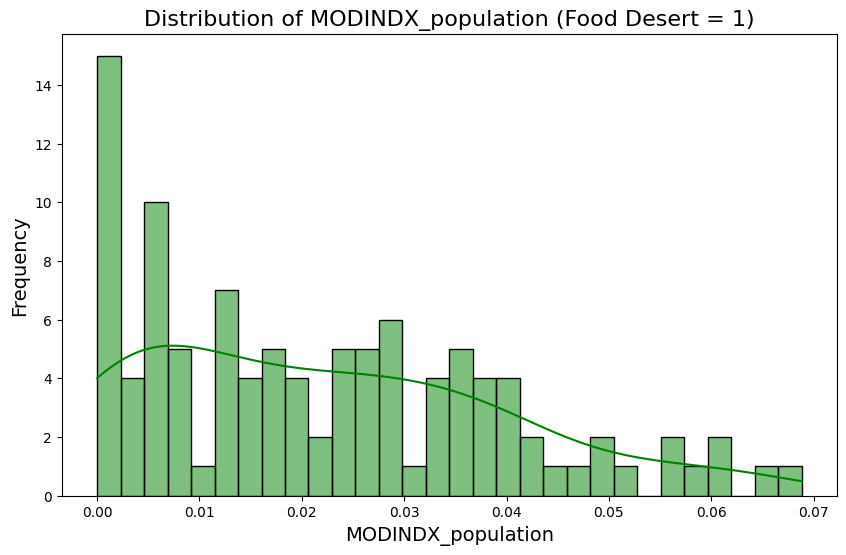

In [29]:
# Playing around with a potential example

# Step 1: Filter rows where 'Food Desert' == 1
filtered_data = modindx_indx[modindx_indx['Food Desert'] == 1]

# Step 2: Extract the 'MODINDX_population' column
modindx_population = filtered_data['MODINDX_population']

# Step 3: Plot the distribution
plt.figure(figsize=(10, 6))

# Histogram with KDE overlay
sns.histplot(modindx_population, kde=True, bins=30, color='green')

# Add labels and title
plt.title('Distribution of MODINDX_population (Food Desert = 1)', fontsize=16)
plt.xlabel('MODINDX_population', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.show()

In [30]:
target = 'Food Desert'
features = SocEconCrime.drop(columns=['county_name', target])

X_train, X_test, y_train, y_test = train_test_split(features, SocEconCrime[target], test_size=0.3, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9661610268378062
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       826
           1       0.62      0.16      0.26        31

    accuracy                           0.97       857
   macro avg       0.80      0.58      0.62       857
weighted avg       0.96      0.97      0.96       857



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Report
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9661610268378062
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       826
           1       0.62      0.16      0.26        31

    accuracy                           0.97       857
   macro avg       0.80      0.58      0.62       857
weighted avg       0.96      0.97      0.96       857



In [32]:

target = 'Food Desert'
features = SocEconCrime.drop(columns=['county_name', target])


X_train, X_test, y_train, y_test = train_test_split(features, SocEconCrime[target], test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM classifier
svm_model = SVC(kernel='rbf', random_state=42) 
svm_model.fit(X_train_scaled, y_train)

# 
y_pred = svm_model.predict(X_test_scaled)

# Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9894982497082847
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       826
           1       0.96      0.74      0.84        31

    accuracy                           0.99       857
   macro avg       0.97      0.87      0.92       857
weighted avg       0.99      0.99      0.99       857



In [33]:
import pandas as pd

In [34]:
FoodResearchAtlas2015 = pd.ExcelFile('2015 Food Environment Atlas Data Download.xls')
FoodResearchAtlas2015.sheet_names

['Read_Me',
 'Variable List',
 'Supplemental Data - County',
 'Supplemental Data - State',
 'ACCESS',
 'ASSISTANCE',
 'HEALTH',
 'INSECURITY',
 'LOCAL',
 'PRICES_TAXES',
 'RESTAURANTS',
 'STORES',
 'SOCIOECONOMIC']

In [35]:
# Food Access Data
food_atlas_access_df=FoodResearchAtlas2015.parse('ACCESS')

# Socio Economic Data
food_atlas_socioeconomic_df=FoodResearchAtlas2015.parse('SOCIOECONOMIC')
food_atlas_socioeconomic_df=food_atlas_socioeconomic_df.drop(['State', 'County'], axis=1)

# Population Data - Choose only 2010
food_atlas_population_df=FoodResearchAtlas2015.parse('Supplemental Data - County')
food_atlas_population_df=food_atlas_population_df[['FIPS Code','State', 'County name', '2010 Census population']]
food_atlas_population_df.rename(columns={'FIPS Code': 'FIPS'}, inplace=True)
food_atlas_population_df=food_atlas_population_df.drop(['State', 'County name'], axis=1)

# Merge the data frames
food_atlas_df = pd.merge(food_atlas_access_df, food_atlas_socioeconomic_df, on='FIPS')
food_atlas_df = pd.merge(food_atlas_df, food_atlas_population_df, on='FIPS')

food_atlas_df.head()

,FIPS,State,County,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,...,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC10,POVRATE10,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00,2010 Census population
0,1001,AL,Autauga,18428.439685,33.769657,5344.427472,9.793530,4822.500269,8.837112,2388.233228,...,11.995382,26.777959,53049,11.9,0,17.5,0,1,0,54571
1,1003,AL,Baldwin,35210.814078,19.318473,9952.144027,5.460261,7916.131932,4.343199,6404.008603,...,16.771185,22.987408,47618,13.3,0,20.2,0,1,0,182265
2,1005,AL,Barbour,5722.305602,20.840972,3135.676086,11.420316,940.419327,3.425062,770.214550,...,14.236807,21.906982,33074,25.3,1,36.2,1,0,0,27457
3,1007,AL,Bibb,1044.867327,4.559753,491.449066,2.144661,249.204753,1.087518,150.553323,...,12.681650,22.696923,35472,20.9,0,28.6,1,1,0,22915
4,1009,AL,Blount,1548.175559,2.700840,609.027708,1.062468,384.911607,0.671490,195.049051,...,14.722096,24.608353,42906,16.5,0,24.1,0,1,0,57322


In [36]:
food_atlas_access_df.columns

Index(['FIPS', 'State', 'County', 'LACCESS_POP10', 'PCT_LACCESS_POP10',
       'LACCESS_LOWI10', 'PCT_LACCESS_LOWI10', 'LACCESS_CHILD10',
       'PCT_LACCESS_CHILD10', 'LACCESS_SENIORS10', 'PCT_LACCESS_SENIORS10',
       'LACCESS_HHNV10', 'PCT_LACCESS_HHNV10'],
      dtype='object')

In [37]:
FOOD_DESERT_ACCCESS_THRESHOLD=30
# Add a LACCESS_POP10_FLAG column and set to 1 if PCT_LACCESS_POP10 > 0.3
food_atlas_df['LACCESS_POP10_FLAG'] = food_atlas_df['PCT_LACCESS_POP10'].apply(lambda x: 1 if x > FOOD_DESERT_ACCCESS_THRESHOLD else 0)
food_atlas_df['LACCESS_LOWI10_FLAG'] = food_atlas_df['PCT_LACCESS_LOWI10'].apply(lambda x: 1 if x > FOOD_DESERT_ACCCESS_THRESHOLD else 0)
food_atlas_df['LACCESS_CHILD10_FLAG'] = food_atlas_df['PCT_LACCESS_CHILD10'].apply(lambda x: 1 if x > FOOD_DESERT_ACCCESS_THRESHOLD else 0)
food_atlas_df['LACCESS_SENIORS10_FLAG'] = food_atlas_df['PCT_LACCESS_SENIORS10'].apply(lambda x: 1 if x > FOOD_DESERT_ACCCESS_THRESHOLD else 0)
food_atlas_df['LACCESS_HHNV10_FLAG'] = food_atlas_df['PCT_LACCESS_HHNV10'].apply(lambda x: 1 if x > FOOD_DESERT_ACCCESS_THRESHOLD else 0)

# Replace all '<Null>' with 0
food_atlas_df = food_atlas_df.replace('<Null>', 0)

# Show all the column types
food_atlas_df.dtypes

/var/folders/hn/d_xtpgtj16x0lv7mgcy_jfqh0000gn/T/ipykernel_1843/628899762.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  food_atlas_df = food_atlas_df.replace('<Null>', 0)


FIPS                        int64
State                      object
County                     object
LACCESS_POP10             float64
PCT_LACCESS_POP10         float64
LACCESS_LOWI10            float64
PCT_LACCESS_LOWI10        float64
LACCESS_CHILD10           float64
PCT_LACCESS_CHILD10       float64
LACCESS_SENIORS10         float64
PCT_LACCESS_SENIORS10     float64
LACCESS_HHNV10            float64
PCT_LACCESS_HHNV10        float64
PCT_NHWHITE10             float64
PCT_NHBLACK10             float64
PCT_HISP10                float64
PCT_NHASIAN10             float64
PCT_NHNA10                float64
PCT_NHPI10                float64
PCT_65OLDER10             float64
PCT_18YOUNGER10           float64
MEDHHINC10                  int64
POVRATE10                 float64
PERPOV10                    int64
CHILDPOVRATE10            float64
PERCHLDPOV10                int64
METRO13                     int64
POPLOSS00                   int64
2010 Census population      int64
LACCESS_POP10_

In [38]:
# Load crime data
crime_df = pd.read_csv('crime_data_w_population_and_crime_rate.csv')

if 'index' in crime_df.columns:
    crime_df = crime_df.drop(['index', 'EDITION', 'PART', 'population', 'FIPS_ST', 'FIPS_CTY', 'IDNO', 'COVIND', 'INDEX', 'MODINDX'], axis=1)

if 'county_name' in crime_df.columns:
    # Split county and state from county_name
    crime_df['County'] = crime_df['county_name'].apply(lambda x: x.split(',')[0])
    crime_df['State'] = crime_df['county_name'].apply(lambda x: x.split(',')[1])

    # Drop the word 'County' from the county name
    crime_df['County'] = crime_df['County'].apply(lambda x: x.replace(' County', ''))
    crime_df['County'] = crime_df['County'].apply(lambda x: x.replace(' city', ''))

    # Strip leading and trailing spaces
    crime_df['County'] = crime_df['County'].apply(lambda x: x.strip())
    crime_df['State'] = crime_df['State'].apply(lambda x: x.strip())

    crime_df = crime_df.drop(['county_name'], axis=1)

food_atlas_crime_df = pd.merge(food_atlas_df, crime_df, on=['State', 'County'])
food_atlas_crime_df = food_atlas_crime_df.dropna()
food_atlas_crime_df.to_excel('foodATLAS.xlsx',index=False)

In [39]:
food_atlas_crime_df.head(10)

,FIPS,State,County,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,...,AG_ARRST,AG_OFF,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON
0,1001,AL,Autauga,18428.439685,33.769657,5344.427472,9.793530,4822.500269,8.837112,2388.233228,...,3,3,3,15,34,87,447,1233,85,108
1,1003,AL,Baldwin,35210.814078,19.318473,9952.144027,5.460261,7916.131932,4.343199,6404.008603,...,14,14,8,30,76,332,967,3829,192,31
2,1005,AL,Barbour,5722.305602,20.840972,3135.676086,11.420316,940.419327,3.425062,770.214550,...,6,4,0,4,8,36,90,362,21,0
3,1007,AL,Bibb,1044.867327,4.559753,491.449066,2.144661,249.204753,1.087518,150.553323,...,5,6,1,4,8,36,122,251,27,0
4,1009,AL,Blount,1548.175559,2.700840,609.027708,1.062468,384.911607,0.671490,195.049051,...,6,6,1,11,9,101,397,865,86,9
5,1011,AL,Bullock,4089.983548,37.474652,2199.359828,20.151730,607.097868,5.562561,554.388021,...,2,2,0,2,12,43,98,55,3,23
6,1013,AL,Butler,1307.819706,6.243470,593.225139,2.832029,264.826077,1.264267,254.954428,...,4,4,6,5,11,87,182,408,30,3
7,1015,AL,Calhoun,30901.150585,26.061086,11909.162858,10.043824,6959.887106,5.869756,4974.957133,...,8,10,6,37,131,504,1710,3482,147,34
8,1017,AL,Chambers,6748.213223,19.722967,3018.284747,8.821525,1531.676677,4.476623,1170.805467,...,4,4,1,7,24,160,374,875,96,5
9,1019,AL,Cherokee,79.410235,0.305553,34.483862,0.132686,17.326047,0.066667,9.222340,...,4,5,1,4,2,102,329,610,75,12


In [40]:
# Split the data into training and test data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = food_atlas_crime_df
# Scale the data
X = X.drop(['LACCESS_POP10', 'PCT_LACCESS_POP10', 'LACCESS_POP10_FLAG', 
            'LACCESS_LOWI10', 'PCT_LACCESS_LOWI10', 'LACCESS_LOWI10_FLAG', 
            'LACCESS_CHILD10', 'PCT_LACCESS_CHILD10', 'LACCESS_CHILD10_FLAG', 
            'LACCESS_SENIORS10', 'PCT_LACCESS_SENIORS10', 'LACCESS_SENIORS10_FLAG', 
            'LACCESS_HHNV10', 'PCT_LACCESS_HHNV10', 'LACCESS_HHNV10_FLAG', 
            'FIPS', 'State', 'County', ], axis=1)
            #'CPOPCRIM', 'CPOPARST', 'crime_rate_per_100000', 'PCT_NHBLACK10', 'PCT_HISP10'], axis=1)
column_names = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = food_atlas_crime_df['LACCESS_POP10_FLAG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Convert X_rain to data frames
X_train_df = pd.DataFrame(X_train, columns=column_names)
X_train_df.head(25)

,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC10,POVRATE10,...,AG_ARRST,AG_OFF,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON
0,0.677225,-0.432612,-0.537841,0.669964,-0.212250,-0.049559,-1.578648,1.162121,1.849144,-1.363323,...,-0.399399,-0.064163,-0.201644,-0.259093,-0.169771,-0.250661,-0.267100,-0.272088,-0.177352,-0.221274
1,-0.843154,1.876114,-0.527057,-0.354801,-0.224933,0.047816,-0.484615,0.898097,-0.766983,0.838819,...,-0.399399,-0.323867,-0.201644,-0.321397,-0.163866,-0.220035,-0.237142,-0.270555,-0.166334,-0.221274
2,0.202141,0.065442,-0.183201,-0.199462,-0.196312,-0.050209,6.598595,-4.264994,0.184185,-0.591770,...,1.172778,0.065689,-0.201644,-0.134484,-0.146150,-0.131325,-0.154317,-0.214904,-0.149019,-0.235693
3,0.908423,-0.499341,-0.597185,-0.402427,-0.199686,-0.068820,0.048470,-0.876622,-0.803751,0.629856,...,-0.036589,-0.323867,-0.201644,-0.333858,-0.171247,-0.248549,-0.290449,-0.296923,-0.183648,-0.235693
4,0.801160,-0.574923,-0.545890,-0.351549,0.148969,-0.046733,0.743951,-0.712347,-0.268454,-0.463178,...,-0.278462,-0.323867,-0.201644,-0.159405,-0.168294,-0.228484,-0.226128,-0.242500,-0.174991,-0.235693
5,-0.288164,-0.594907,1.019384,-0.474422,0.500456,-0.081581,-0.329679,-3.707152,0.647052,-0.350659,...,-0.641272,-0.583570,-0.201644,-0.333858,-0.171247,-0.256998,-0.295736,-0.300296,-0.184435,-0.250111
6,0.937568,-0.589189,-0.559836,-0.389040,-0.188729,-0.081581,1.041427,-0.521881,1.193960,-1.347249,...,-0.520336,-0.453718,-0.201644,-0.333858,-0.171247,-0.255942,-0.294855,-0.297843,-0.184435,-0.250111
7,0.925872,-0.569766,-0.533363,-0.344088,-0.217183,-0.056972,0.159981,0.926771,0.174417,-0.318511,...,-0.036589,-0.323867,-0.201644,-0.271554,-0.171247,-0.246437,-0.269743,-0.269941,-0.176565,-0.235693
8,0.794191,-0.447572,-0.521570,-0.237471,-0.207463,-0.062892,0.633064,-0.829349,-0.629312,0.211932,...,0.205284,0.455244,-0.075159,0.363953,-0.067907,0.563571,0.178746,0.332400,0.050885,0.283371
9,-0.711691,1.701511,-0.520366,-0.394782,-0.222187,-0.081581,-0.566146,0.453928,-1.138715,2.076519,...,-0.520336,-0.583570,-0.201644,-0.333858,-0.171247,-0.252773,-0.284281,-0.292937,-0.184435,-0.250111


In [41]:
# Perform logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)


0.7699836867862969

In [42]:
# Display coefficients
coefficients = pd.DataFrame(logreg.coef_[0], column_names, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))

coefficients = pd.DataFrame(logreg.coef_[0], column_names, columns=['Standardized Coefficient'])
print(coefficients.sort_values(by='Standardized Coefficient', ascending=False))

                        Coefficient
BURGLRY                    1.233865
PCT_65OLDER10              0.577234
POPLOSS00                  0.278644
LARCENY                    0.277463
PERPOV10                   0.192877
RAPE                       0.162991
POVRATE10                  0.150776
CPOPARST                   0.131338
AG_OFF                     0.109888
PCT_18YOUNGER10            0.078581
MEDHHINC10                 0.077333
2010 Census population     0.055256
AGASSLT                    0.039961
METRO13                    0.006301
crime_rate_per_100000     -0.008657
PCT_NHASIAN10             -0.009835
PCT_NHNA10                -0.011316
PCT_NHPI10                -0.107692
PERCHLDPOV10              -0.119286
MURDER                    -0.228596
AG_ARRST                  -0.230721
CPOPCRIM                  -0.239472
PCT_HISP10                -0.295119
ARSON                     -0.325513
CHILDPOVRATE10            -0.526663
PCT_NHBLACK10             -0.627934
ROBBERY                   -0

In [43]:
import statsmodels.api as sm

# Add intercept term
X_train_sm = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit(maxiter=1000)

# Print summary with p-values
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.483636
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:     LACCESS_POP10_FLAG   No. Observations:                 2451
Model:                          Logit   Df Residuals:                     2421
Method:                           MLE   Df Model:                           29
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                  0.1050
Time:                        16:11:40   Log-Likelihood:                -1185.4
converged:                       True   LL-Null:                       -1324.5
Covariance Type:            nonrobust   LLR p-value:                 1.589e-42
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4612      0.067    -21.856      0.000      -1.592      -1.330
x1            -2.9947      1.

In [44]:
print(column_names)

Index(['PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_HISP10', 'PCT_NHASIAN10',
       'PCT_NHNA10', 'PCT_NHPI10', 'PCT_65OLDER10', 'PCT_18YOUNGER10',
       'MEDHHINC10', 'POVRATE10', 'PERPOV10', 'CHILDPOVRATE10', 'PERCHLDPOV10',
       'METRO13', 'POPLOSS00', '2010 Census population',
       'crime_rate_per_100000', 'CPOPARST', 'CPOPCRIM', 'AG_ARRST', 'AG_OFF',
       'MURDER', 'RAPE', 'ROBBERY', 'AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT',
       'ARSON'],
      dtype='object')


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data = X_train_df
# data = data.drop(['CPOPCRIM', 'CPOPARST', 'crime_rate_per_100000', 'PCT_NHBLACK10', 'PCT_HISP10' ], axis=1)
vif = [variance_inflation_factor(data, i) for i in range(data.shape[1])]

# Display VIF values
vif_df = pd.DataFrame({'Variable': data.columns, 'VIF': vif})
print(vif_df)

                  Variable          VIF
0            PCT_NHWHITE10   477.623822
1            PCT_NHBLACK10   244.966642
2               PCT_HISP10   219.510520
3            PCT_NHASIAN10    12.955199
4               PCT_NHNA10    64.391294
5               PCT_NHPI10     3.691304
6            PCT_65OLDER10     3.354323
7          PCT_18YOUNGER10     2.165424
8               MEDHHINC10     6.038424
9                POVRATE10    17.924634
10                PERPOV10     2.158179
11          CHILDPOVRATE10    14.853912
12            PERCHLDPOV10     2.358690
13                 METRO13     1.666028
14               POPLOSS00     1.234993
15  2010 Census population    53.264274
16   crime_rate_per_100000     1.822020
17                CPOPARST  1422.227453
18                CPOPCRIM  1406.104840
19                AG_ARRST    22.735114
20                  AG_OFF    22.521603
21                  MURDER    11.416183
22                    RAPE     8.476807
23                 ROBBERY    12.590472


In [66]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Train the SVM model

svm_model = SVC(kernel='linear', random_state=42)  # Linear kernel for coefficients
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Extract coefficients (feature importance)
coefficients = svm_model.coef_.flatten()

# Rank features by importance
feature_importance = pd.DataFrame({
    'Feature': column_names,
    'Coefficient': coefficients,
    'Importance': abs(coefficients)  # Absolute value for importance
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       454
           1       0.00      0.00      0.00       159

    accuracy                           0.74       613
   macro avg       0.37      0.50      0.43       613
weighted avg       0.55      0.74      0.63       613

Accuracy: 0.74

Feature Importance:
                   Feature  Coefficient  Importance
0            PCT_NHWHITE10     0.005512    0.005512
1            PCT_NHBLACK10     0.003968    0.003968
2               PCT_HISP10     0.003701    0.003701
4               PCT_NHNA10     0.003467    0.003467
27                 MVTHEFT    -0.000819    0.000819
3            PCT_NHASIAN10     0.000801    0.000801
25                 BURGLRY     0.000632    0.000632
17                CPOPARST     0.000566    0.000566
18                CPOPCRIM    -0.000514    0.000514
23                 ROBBERY    -0.000483    0.000483
5               PCT_NHPI10     0.000348   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

## County Breakdown

In [47]:
# Correctly define the path to the GeoJSON file
geojson_path = 'geojson-counties-fips.json'
from folium.features import GeoJsonTooltip
import folium
from IPython.display import display, IFrame

# Create the map
m = folium.Map(location=[37.8, -96.9], zoom_start=5)

# Add GeoJSON to the map with LACCESS_POP10_FLAG as the color field and county names
choropleth = folium.Choropleth(
    geo_data=geojson_path,               # GeoJSON file path
    name="choropleth",
    data=food_atlas_crime_df,               # Data containing LACCESS_POP10_FLAG
    columns=["FIPS", "LACCESS_POP10_FLAG"],  # Columns to match FIPS and value
    key_on="feature.id",                # Key in GeoJSON to match FIPS
    fill_color="YlOrRd",                # Color scale
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="LACCESS_POP10_FLAG",
).add_to(m)

# Add county names to the choropleth as tooltips
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(
        fields=["NAME"],  # Include county name and food desert flag
        aliases=["County:"],  # Label for each field
        localize=True
    )
)

# Add layer control to toggle layers
folium.LayerControl().add_to(m)



# Save and display the map
map_file_path = "Food_Desert_Map_0.html"
m.save(map_file_path)
map_file_path

# Display the map in the notebook
display(IFrame(map_file_path, width=800, height=600))

In [48]:
# Correctly define the path to the GeoJSON file
geojson_path = 'geojson-counties-fips.json'
from folium.features import GeoJsonTooltip
import folium
from IPython.display import display, IFrame

# Create the map
m = folium.Map(location=[37.8, -96.9], zoom_start=5)

# Add GeoJSON to the map with LACCESS_POP10_FLAG as the color field and county names
choropleth = folium.Choropleth(
    geo_data=geojson_path,               # GeoJSON file path
    name="choropleth",
    data=food_atlas_crime_df,               # Data containing LACCESS_POP10_FLAG
    columns=["FIPS", "PCT_LACCESS_POP10"],  # Columns to match FIPS and value
    key_on="feature.id",                # Key in GeoJSON to match FIPS
    fill_color="YlOrRd",                # Color scale
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="PCT_LACCESS_POP10",
).add_to(m)

# Add county names to the choropleth as tooltips
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(
        fields=["NAME"],  # Include county name and food desert flag
        aliases=["County:"],  # Label for each field
        localize=True
    )
)

# Add layer control to toggle layers
folium.LayerControl().add_to(m)



# Save and display the map
map_file_path = "Food_Desert_Map_1.html"
m.save(map_file_path)
map_file_path

# Display the map in the notebook
display(IFrame(map_file_path, width=800, height=600))

<Axes: xlabel='PCT_LACCESS_POP10', ylabel='Count'>

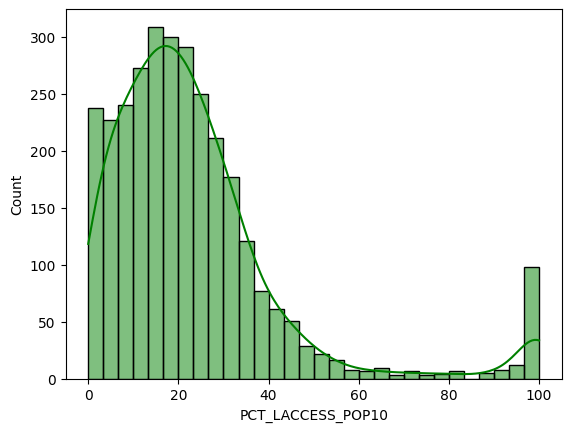

In [49]:
sns.histplot(food_atlas_crime_df['PCT_LACCESS_POP10'], kde=True, bins=30, color='green')

<Axes: xlabel='POVRATE10', ylabel='Count'>

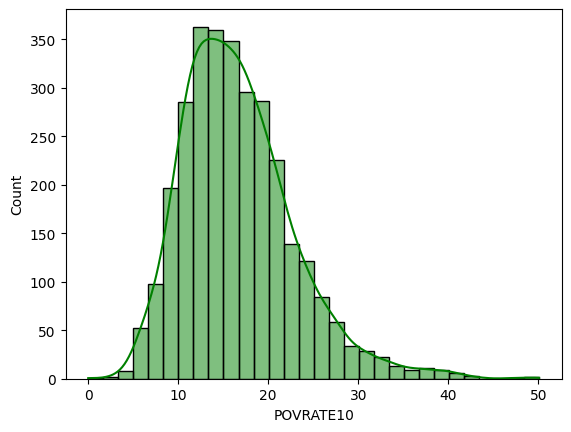

In [50]:
sns.histplot(food_atlas_crime_df['POVRATE10'], kde=True, bins=30, color='green')

<Axes: xlabel='CHILDPOVRATE10', ylabel='Count'>

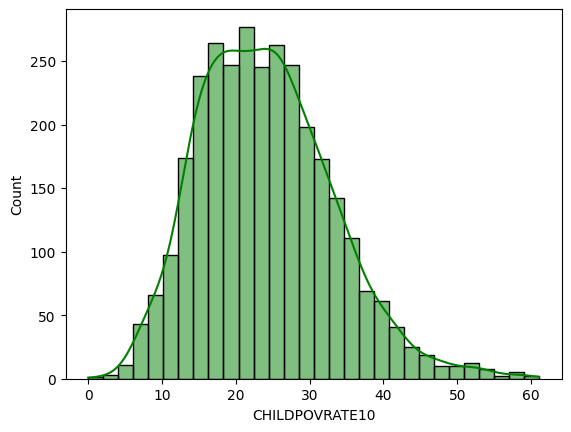

In [51]:
#CHILDPOVRATE10
sns.histplot(food_atlas_crime_df['CHILDPOVRATE10'], kde=True, bins=30, color='green')

In [52]:
food_atlas_crime_df.describe()

,FIPS,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,PCT_LACCESS_SENIORS10,LACCESS_HHNV10,...,AG_ARRST,AG_OFF,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON
count,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,...,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000
mean,30886.573433,20466.704337,23.383292,5565.862686,8.266181,5027.775780,5.446103,2736.077287,3.937280,660.550246,...,6.302546,5.494125,4.782637,26.792428,115.998042,243.352154,671.274478,1960.794386,234.344648,17.346606
std,15108.790414,52157.462255,20.211529,13973.845224,8.129816,13380.908116,4.816022,6646.521627,4.256727,1128.634848,...,8.270140,7.702345,23.722105,80.264031,677.482948,947.058386,2270.214791,6523.940965,1270.815109,69.366943
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19010.500000,1655.598922,10.660073,592.097753,3.385565,362.496398,2.368949,279.603607,1.573819,116.729779,...,2.000000,2.000000,0.000000,1.000000,0.000000,10.000000,37.000000,81.000000,6.000000,0.000000
50%,30044.000000,4090.041291,19.515439,1492.851376,6.108552,936.473185,4.416584,678.866117,2.824881,314.463149,...,4.000000,3.000000,0.000000,5.000000,4.000000,36.000000,133.000000,350.500000,22.000000,3.000000
75%,46051.500000,12962.155450,29.428079,4555.537288,10.192647,3008.919496,6.920742,1885.576353,4.539879,702.654702,...,7.000000,6.000000,2.000000,19.000000,22.000000,124.000000,418.250000,1212.000000,74.000000,10.000000
max,56045.000000,886068.668386,100.000001,292541.789025,72.274456,260308.794094,34.015595,78922.918719,29.208633,16334.423176,...,150.000000,140.000000,600.000000,1976.000000,18923.000000,23057.000000,49107.000000,142604.000000,40555.000000,2210.000000


In [53]:
food_atlas_crime_df.columns

Index(['FIPS', 'State', 'County', 'LACCESS_POP10', 'PCT_LACCESS_POP10',
       'LACCESS_LOWI10', 'PCT_LACCESS_LOWI10', 'LACCESS_CHILD10',
       'PCT_LACCESS_CHILD10', 'LACCESS_SENIORS10', 'PCT_LACCESS_SENIORS10',
       'LACCESS_HHNV10', 'PCT_LACCESS_HHNV10', 'PCT_NHWHITE10',
       'PCT_NHBLACK10', 'PCT_HISP10', 'PCT_NHASIAN10', 'PCT_NHNA10',
       'PCT_NHPI10', 'PCT_65OLDER10', 'PCT_18YOUNGER10', 'MEDHHINC10',
       'POVRATE10', 'PERPOV10', 'CHILDPOVRATE10', 'PERCHLDPOV10', 'METRO13',
       'POPLOSS00', '2010 Census population', 'LACCESS_POP10_FLAG',
       'LACCESS_LOWI10_FLAG', 'LACCESS_CHILD10_FLAG', 'LACCESS_SENIORS10_FLAG',
       'LACCESS_HHNV10_FLAG', 'crime_rate_per_100000', 'CPOPARST', 'CPOPCRIM',
       'AG_ARRST', 'AG_OFF', 'MURDER', 'RAPE', 'ROBBERY', 'AGASSLT', 'BURGLRY',
       'LARCENY', 'MVTHEFT', 'ARSON'],
      dtype='object')

In [77]:
countAccess=food_atlas_crime_df[['LACCESS_POP10_FLAG','BURGLRY','ROBBERY']].value_counts().reset_index()

In [78]:
countAccess.columns

Index(['LACCESS_POP10_FLAG', 'BURGLRY', 'ROBBERY', 'count'], dtype='object')

In [79]:
total_count = countAccess['count'].sum()  # Sum of all counts
countAccess['percentage'] = (countAccess['count'] / total_count) * 100

In [80]:
countAccess.groupby(by='LACCESS_POP10_FLAG').sum()

,BURGLRY,ROBBERY,count,percentage
LACCESS_POP10_FLAG,,,,
0,1625803,304946,2339,76.33812
1,368531,41169,725,23.66188


In [81]:
total_count = countAccess['BURGLRY'].sum()  # Sum of all counts
countAccess['BURGLRY percentage'] = (countAccess['BURGLRY'] / total_count) * 100

In [82]:
countAccess

,LACCESS_POP10_FLAG,BURGLRY,ROBBERY,count,percentage,BURGLRY percentage
0,1,0,0,65,2.121410,0.000000
1,0,0,0,41,1.338120,0.000000
2,1,3,0,22,0.718016,0.000150
3,1,6,0,19,0.620104,0.000301
4,1,1,0,18,0.587467,0.000050
...,...,...,...,...,...,...
2113,0,263,6,1,0.032637,0.013187
2114,0,262,18,1,0.032637,0.013137
2115,0,262,9,1,0.032637,0.013137
2116,0,261,6,1,0.032637,0.013087


In [83]:
countAccess.groupby(by='LACCESS_POP10_FLAG').sum()

,BURGLRY,ROBBERY,count,percentage,BURGLRY percentage
LACCESS_POP10_FLAG,,,,,
0,1625803,304946,2339,76.33812,81.521099
1,368531,41169,725,23.66188,18.478901
